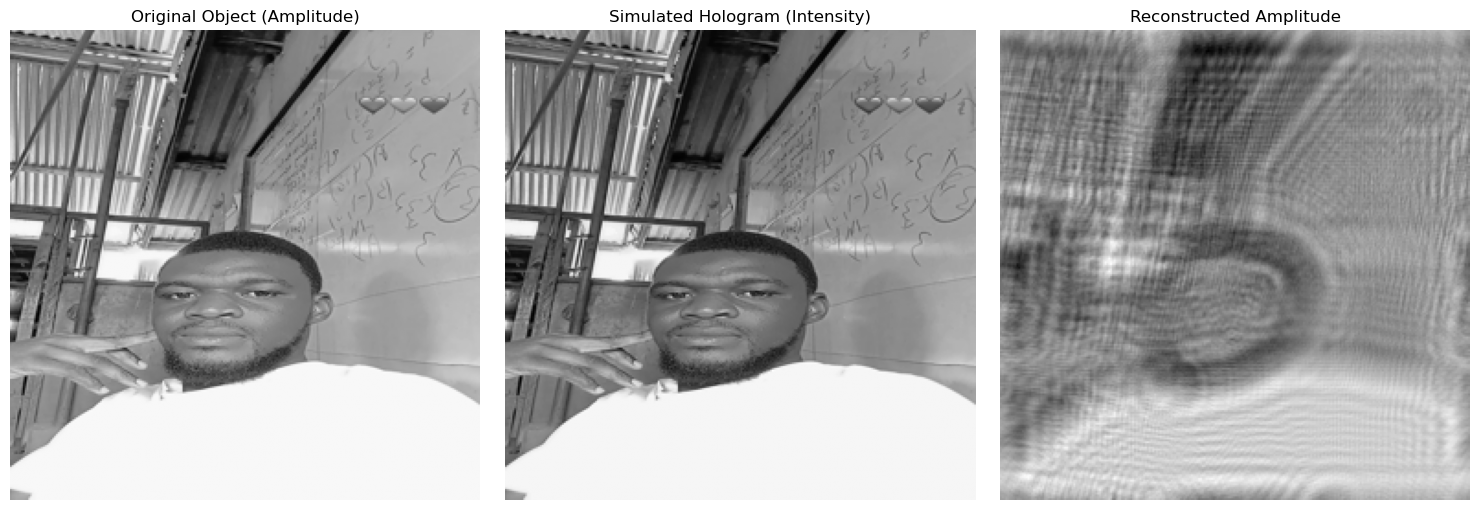

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from scipy.fft import fft2, ifft2, fftshift, ifftshift

def load_and_preprocess_image(path, size=(256,256)):
    img = Image.open(path).convert('L')  # grayscale
    img = img.resize(size)
    img_array = np.array(img) / 255.0  # normalize
    return img_array

def fresnel_propagation(u0, L, wavelength, z):

    #Fresnel propagation using Fourier method
    #u0: complex field at object plane (NxN)
    #L: physical size of the field (meters)
    #wavelength: wavelength of light (meters)
    #z: propagation distance (meters)
    
    N = u0.shape[0]
    k = 2 * np.pi / wavelength

    dx = L / N  # sample spacing
    fx = np.fft.fftfreq(N, d=dx)
    FX, FY = np.meshgrid(fx, fx)
    H = np.exp(-1j * np.pi * wavelength * z * (FX**2 + FY**2))

    U0 = fft2(u0)
    Uz = ifft2(U0 * H)

    return Uz

def generate_hologram(obj_field, ref_field):
 
   # Generate hologram intensity from object and reference fields
 
    holo = np.abs(obj_field + ref_field)**2
    return holo / holo.max()  # normalize

def reconstruct(hologram, L, wavelength, z):
    
    #Reconstruct complex field from hologram by backward Fresnel propagation
    
    # Treat hologram amplitude as input field
    u_holo = np.sqrt(hologram)  # approximate field amplitude
    # Assume zero phase for simplicity
    u_holo_complex = u_holo.astype(np.complex64)

    u_rec = fresnel_propagation(u_holo_complex, L, wavelength, -z)  # backward
    return u_rec

# Parameters
image_path = r"C:\Users\HP\Desktop\New folder (3)\Snapchat-643947850.jpg"
wavelength = 633e-9  # 633 nm, red HeNe laser typical
L = 5e-3  # 5 mm field size (physical size of image plane)
z = 0.1  # 10 cm propagation distance

# Load and preprocess image
obj_amp = load_and_preprocess_image(image_path)
N = obj_amp.shape[0]

# Assume zero phase for object wave (amplitude only)
obj_field = obj_amp.astype(np.complex64)

# Reference wave: plane wave with unit amplitude and zero phase
ref_field = np.ones_like(obj_field, dtype=np.complex64)

# Generate hologram
hologram = generate_hologram(obj_field, ref_field)

# Reconstruct object from hologram
reconstructed = reconstruct(hologram, L, wavelength, z)

# Visualization
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title("Original Object (Amplitude)")
plt.imshow(obj_amp, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title("Simulated Hologram (Intensity)")
plt.imshow(hologram, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title("Reconstructed Amplitude")
plt.imshow(np.abs(reconstructed), cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.savefig("blurry securty reconstruction of holograms")
plt.show()